In [157]:
# from geojson import Feature, Point, FeatureCollection
from shapely.geometry import Polygon, LineString, MultiPolygon, MultiLineString
# from pandas import DataFrame as df
# from geopandas.tools import overlay
import matplotlib.pyplot as plt
import geopandas as gpd
# import pandas as pd
# import numpy as np
%matplotlib inline
# import shapely
import geojson
# import subprocess
import folium
import pyproj

# conda install -c conda-forge mapclassify


# from mpl_toolkits.axes_grid1 import make_axes_locatable



In [129]:
data = "data.geojson"
geodata = geojson.load(open(data))
# geodata

<AxesSubplot:title={'center':'GEOJSON'}>

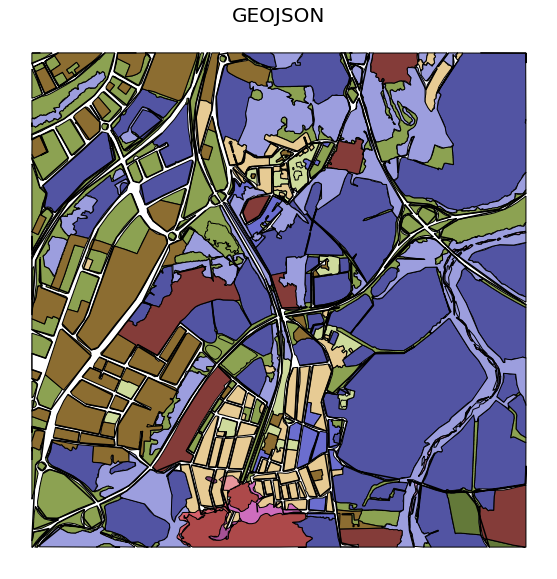

In [130]:
tmp = []
polygons = []
line=[]
for i in range(0, len(geodata['features'])):
    if i!=9:
        for j in range(0, len(geodata['features'][i]['geometry']["coordinates"])):

            if len(geodata['features'][i]['geometry']["coordinates"][j]) >= 3:
                polygons.append(Polygon(geodata['features'][i]['geometry']["coordinates"][j]))


        tmp.append( {
                'Slabel': geodata['features'][i]['properties']['Slabel'],
                'Plabel': geodata['features'][i]['properties']['Plabel'],
                'geometry' : MultiPolygon(polygons)
           })
    else:
        for k in range(0, len(geodata['features'][i]['geometry']["coordinates"])):
            if len(geodata['features'][i]['geometry']["coordinates"][k]) >=2:
                line.append(LineString(geodata['features'][i]['geometry']["coordinates"][k]))
                
        tmp.append({
            'Slabel': geodata['features'][i]['properties']['Slabel'],
            'Plabel': geodata['features'][i]['properties']['Plabel'],
            'geometry' :  MultiLineString(line)
            })
                
    del polygons[:]
        
gdf = gpd.GeoDataFrame(tmp)

# gdf.index = np.arange(1, len(gdf) + 1)

gdf = gdf.set_crs('epsg:32631')

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()


gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1)
# gdf

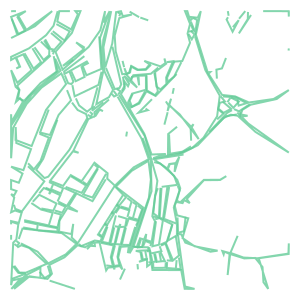

In [131]:
MultiLineString(line)


In [132]:
# LineString(geodata['features'][9]['geometry']["coordinates"][0])

In [133]:
thick_cld =  gdf.loc[(gdf["Slabel"] == 82)]
thin_cld =  gdf.loc[(gdf["Slabel"] == 81)]

<AxesSubplot:>

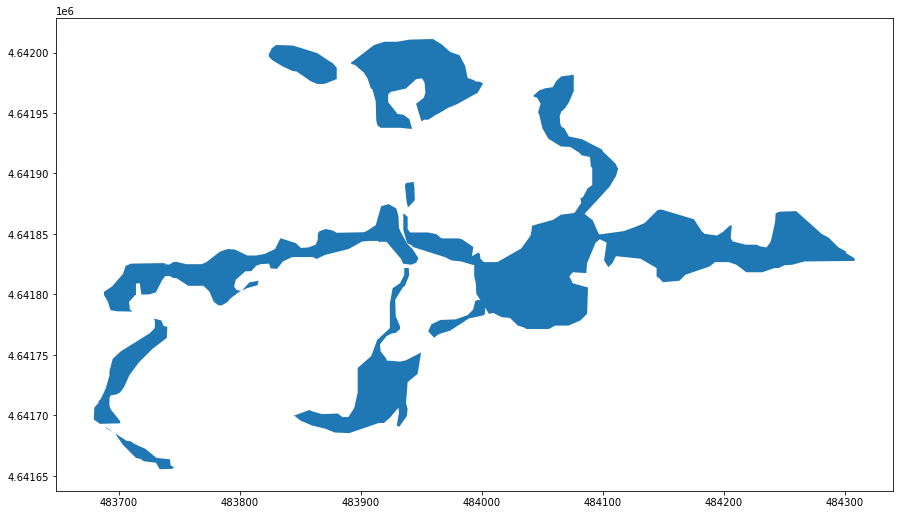

In [134]:
difference=gpd.overlay(thin_cld,thick_cld, how='difference')
# diff=gpd.overlay(thick_cld, thin_cld, how='difference')

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
difference.plot(ax=ax)

In [135]:
gdf2 = gdf
gdf2 = gdf2.drop([13,14,15,16,17]) 

# adding the new cleaned cloud to the origibal data frame
new_gdf = gdf2.append(difference)
# new_gdf.plot()

In [136]:

len(geodata['features'][1]['geometry']["coordinates"][63])
geodata['features'][1]['geometry']["coordinates"][63]


# len(geodata['features'][12]['geometry']["coordinates"])
# geodata['features'][12]['geometry']["coordinates"][0]


# len(geodata['features'][9]['geometry']["coordinates"])


# geodata['features'][1]['geometry']["coordinates"][55]
# geodata['features'][2]['geometry']["coordinates"]

[[483325.55, 4642069.65], [483331.15, 4642067.55]]

In [137]:
dat= Polygon(geodata['features'][9]['geometry']["coordinates"][0])
# dat= Polygon(geodata['features'][14]['geometry']["coordinates"][0])
# dat

In [138]:
dat= Polygon(geodata['features'][9]['geometry']["coordinates"][78]) .boundary

# dat

<AxesSubplot:>

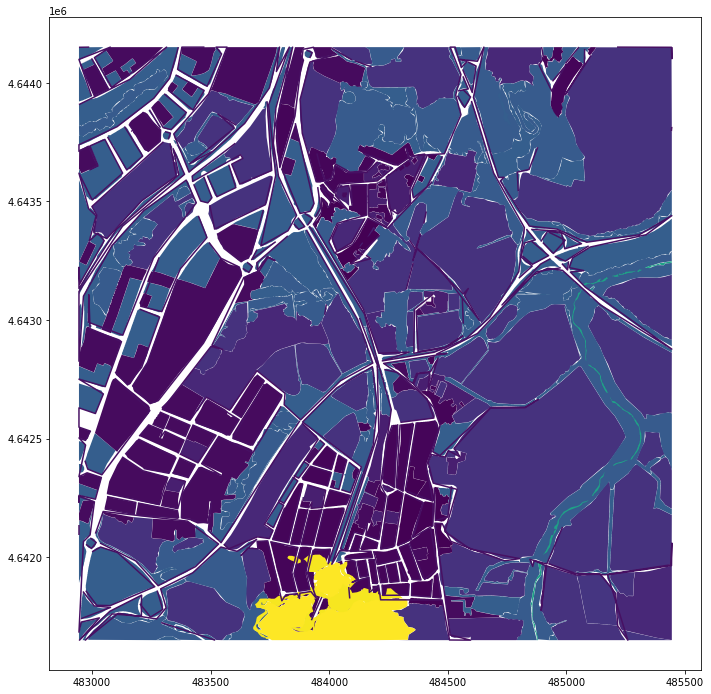

In [139]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

'''
used to plot the legend outside the map


divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
gdf.plot(column='Slabel', ax=ax, legend=True, cax=cax)
'''

gdf.plot(column='Slabel', ax=ax, )#cmap='OrRd', scheme='equal_interval')
# roads =  gdf.loc[(gdf["Slabel"] == 14)]
# roads.plot(column='Slabel', ax=ax, )

In [140]:
thick_cld =  gdf.loc[(gdf["Slabel"] == 82)]
thin_cld =  gdf.loc[(gdf["Slabel"] == 81)]
# thin_cld

<AxesSubplot:>

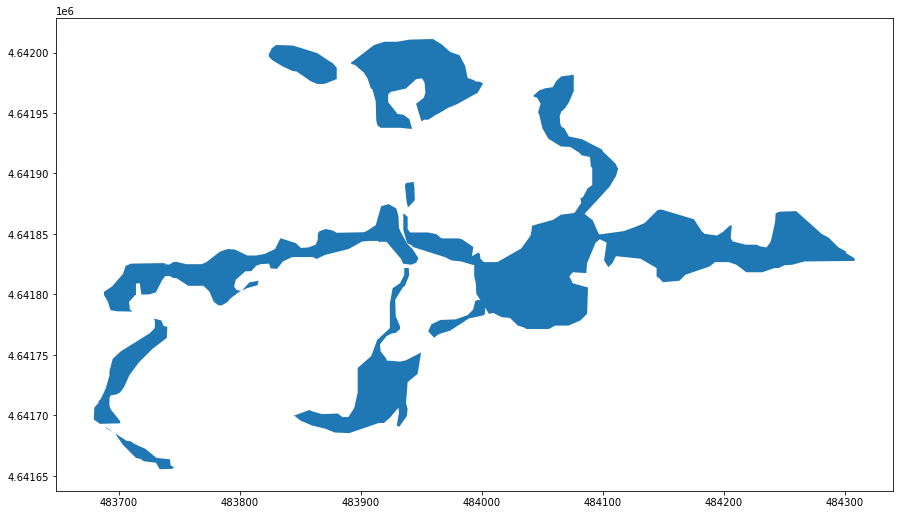

In [141]:
difference=gpd.overlay(thin_cld,thick_cld, how='difference')
# diff=gpd.overlay(thick_cld, thin_cld, how='difference')

fig, ax = plt.subplots(1, 1, figsize=(15, 20))
difference.plot(ax=ax)

In [142]:
intersection=gpd.overlay(thin_cld,thick_cld, how='intersection')

# intersection.plot()

In [143]:
union=gpd.overlay(intersection,thick_cld, how='union')


union['common_column'] = 1
dissolved = union.dissolve(by='common_column')

# dissolved
# dissolved.plot()
# union.plot()

In [144]:
# gdf.to_file('example.geojson')
# gdf.to_file('examp.shp')

<AxesSubplot:>

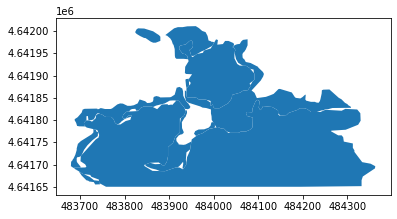

In [145]:
new_cloud = difference.append(thick_cld)
new_cloud.plot()

<AxesSubplot:title={'center':'GEOJSON'}>

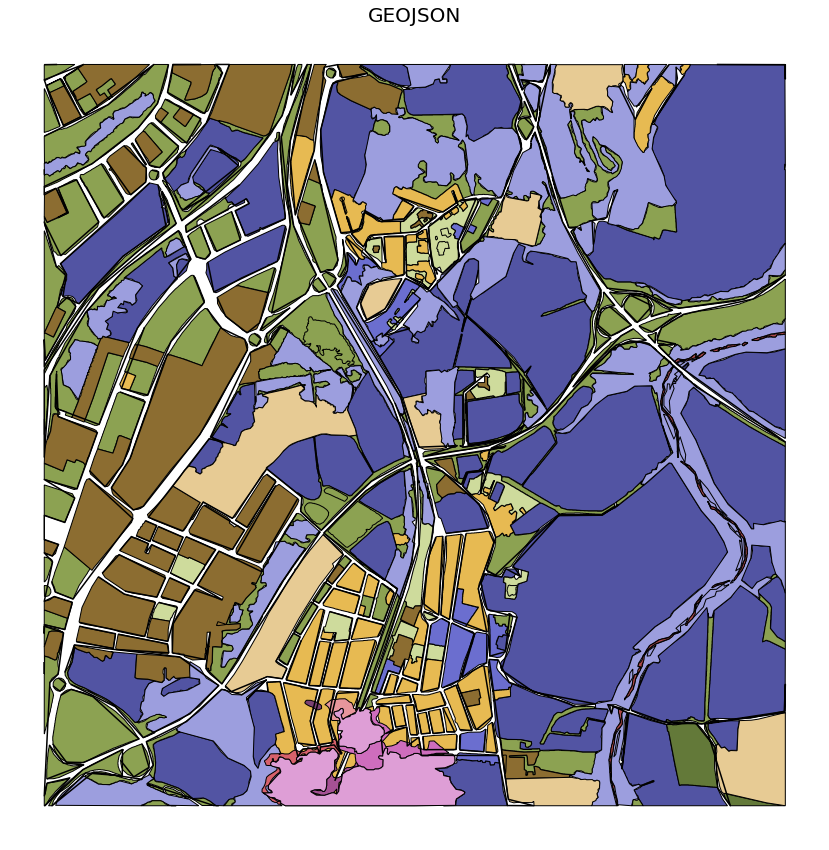

In [146]:
# creating a copy of the new data frame
gdf_copy = gdf

# droping rows that have overlays
gdf_copy = gdf_copy.drop([13, 14, 15, 16, 17])

# adding the new cleaned cloud to the origibal data frame
new_gdf = gdf_copy.append(new_cloud)


# new_gdf

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()

new_gdf.plot(ax=ax, edgecolor='k', cmap='tab20b', alpha=1)
# column='Slabel', color='yellow',  cmap='OrRd' scheme='equal_interval'

In [147]:
# new_full_gdf.to_file('exam.geojson', driver='GeoJSON')
# new_full_gdf.to_file('exam.shp')

In [148]:
# projshp2= projshp.to_file('projshp.geojson', driver='GeoJSON')

In [149]:
# geoj =gpd.read_file('projshp.geojson')

In [150]:
data2 = "projshp.geojson"
geodata2 = geojson.load(open(data2))
# type(geodata2)

In [151]:
# converting projections
wgs84 = pyproj.Proj(projparams = 'epsg:4326')
InputGrid = pyproj.Proj(projparams = 'epsg:32631')


x1, y1 = 483742.781,4641824.138
lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)


def style_function(feature):
    return {
        "fillOpacity": 0.2,
        "weight": 2,
        "fillColor": "yellow",
        "line_opacity":0.5,
        "color":'black',
        
    }


m = folium.Map(location = [lat, lon], tiles = "Stamen Toner", zoom_start = 14)
folium.features.GeoJson(
    data = geodata2, 
    name="GeoJson", 
    show=True, 
    style_function=style_function).add_to(m)


folium.LayerControl().add_to(m)
m

C:\Users\DELL\AppData\Local\Temp/ipykernel_6276/3624292532.py:7: DeprecationWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  lat, lon = pyproj.transform(InputGrid, wgs84, x1, y1)


In [152]:
from geopandas.tools import overlay
# newdf = polydf.overlay(polydf2, how="intersection")

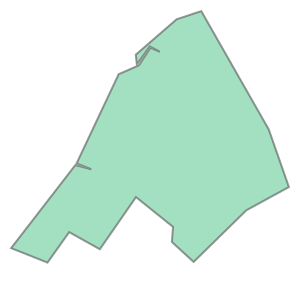

In [153]:
Polygon(geodata['features'][9]['geometry']["coordinates"][2])

In [154]:

line=[]
for i in range(0, len(geodata['features'][9]['geometry']["coordinates"])):
    if len(geodata['features'][9]['geometry']["coordinates"][i]) >=2:
        line.append(LineString(geodata['features'][9]['geometry']["coordinates"][i]))

# LineString(geodata['features'][9]['geometry']["coordinates"][2])
da = MultiLineString(line)
# len(geodata['features'][9]['geometry']["coordinates"][138])
# da

<AxesSubplot:title={'center':'GEOJSON'}>

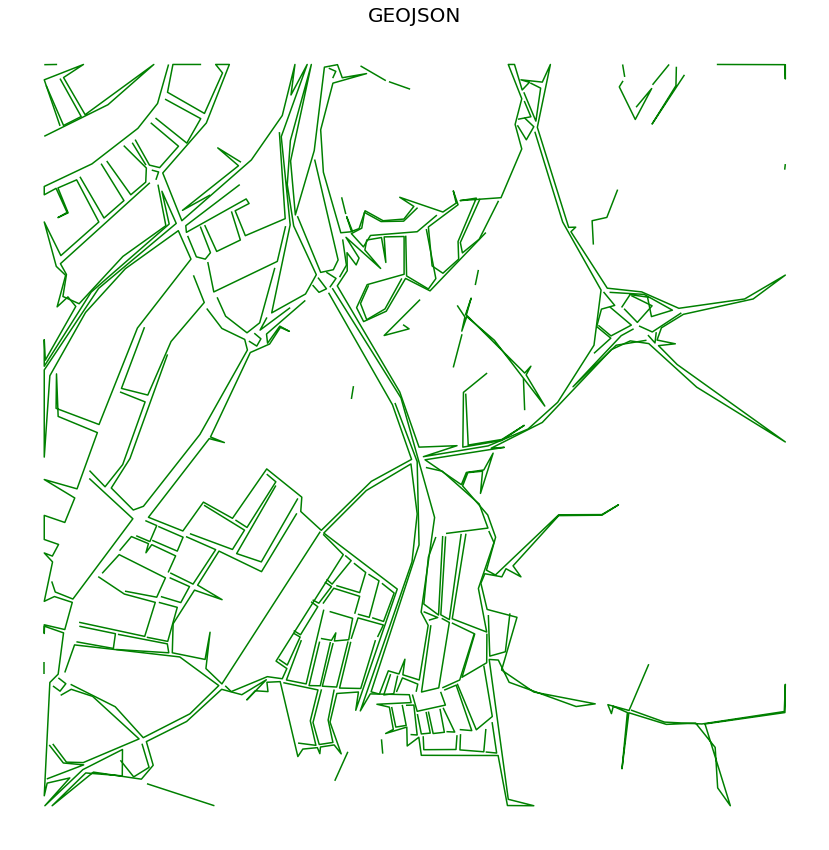

In [155]:
thi_cld =  gdf.loc[(gdf["Slabel"] == 14)]

fig, ax = plt.subplots(1, 1, figsize=(15, 15))

ax.set_title("GEOJSON", fontsize=20)
ax.set_axis_off()

thi_cld.plot(ax=ax, edgecolor='g')